In [1]:
import os
import import_ipynb
from experiment import *

importing Jupyter notebook from experiment.ipynb


---------------INVISIBLE POINT TESTS---------------
Taken by: Martynas
With 0 dose

Accuracy: 0.724
Mean response time: 0.925
Response time standard deviation: 0.679


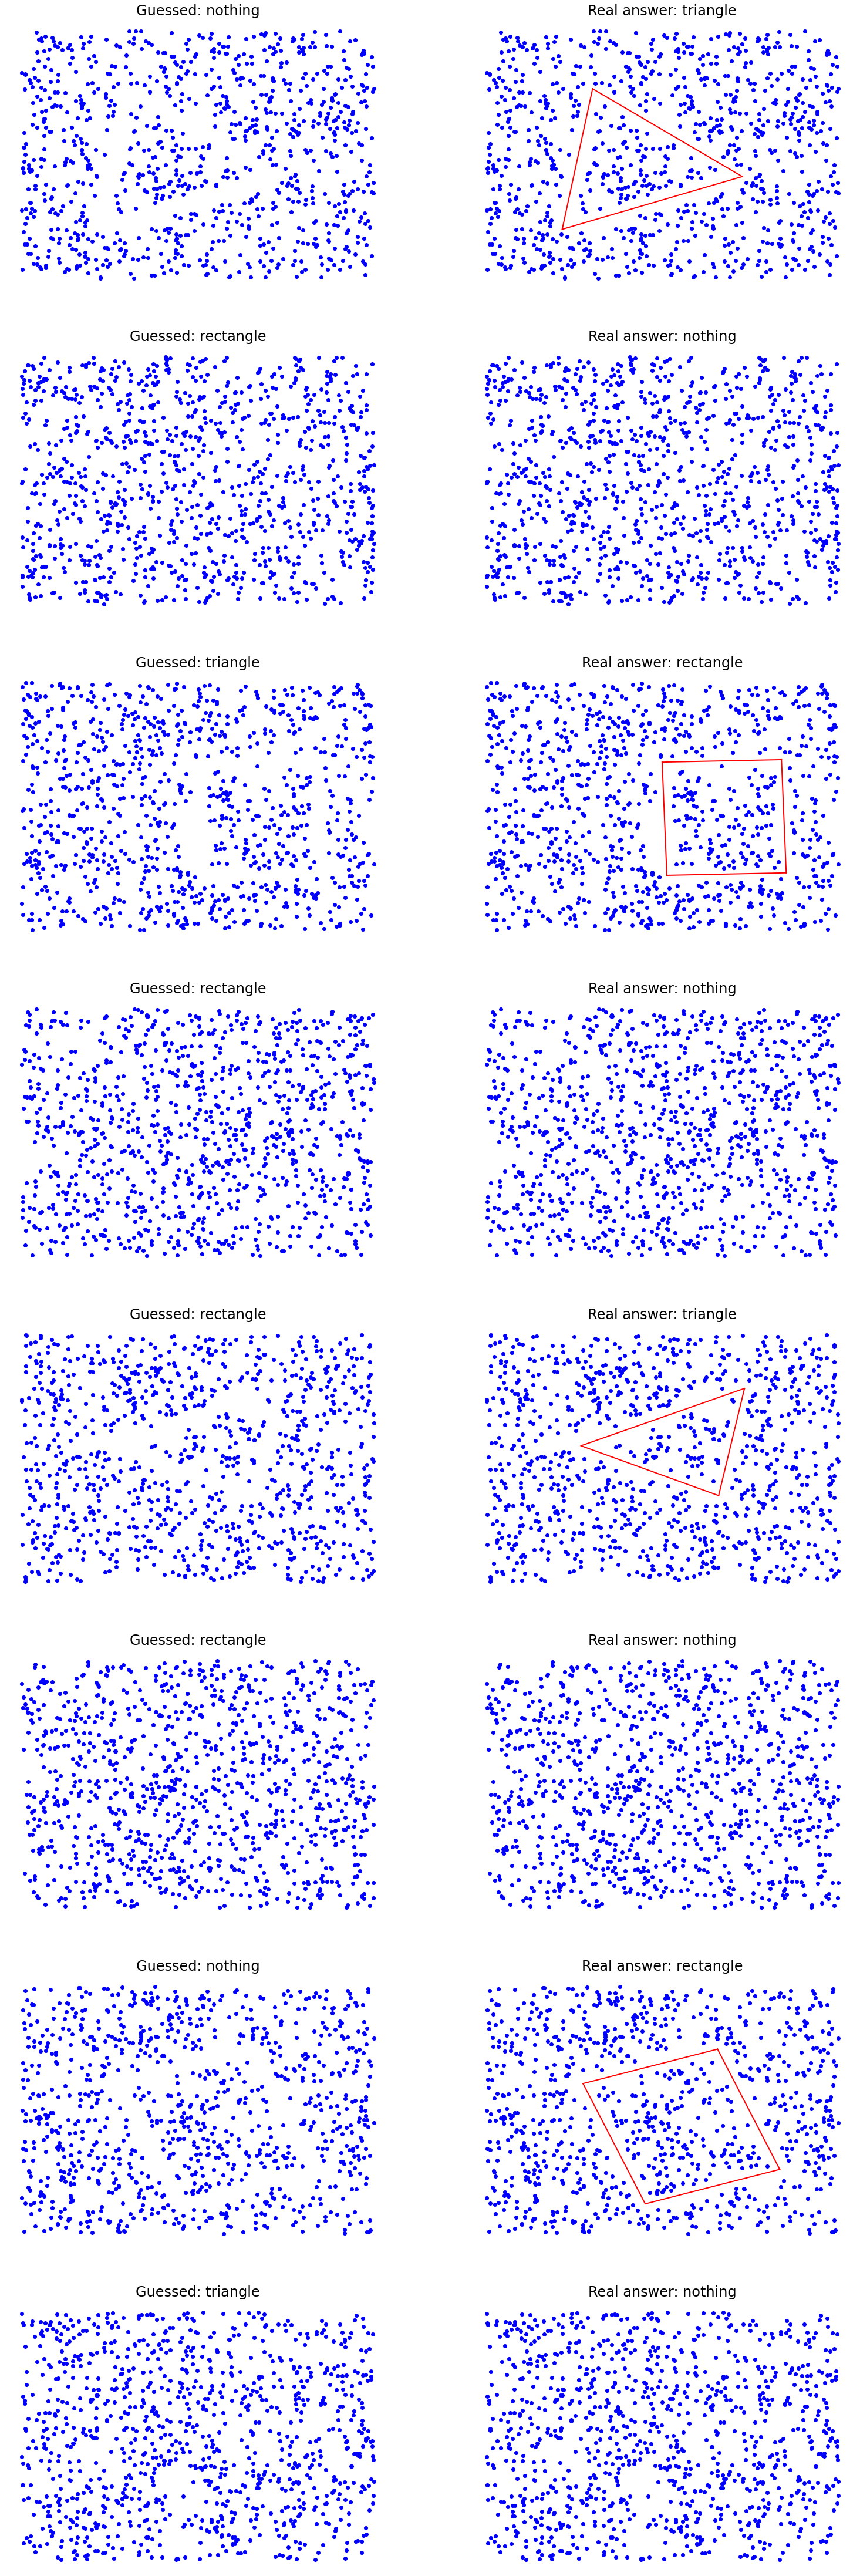

---------------MULTIPLE POINT TESTS---------------
Taken by: Martynas
With 0 dose

Accuracy: 0.414
Mean response time: 0.483
Response time standard deviation: 0.424


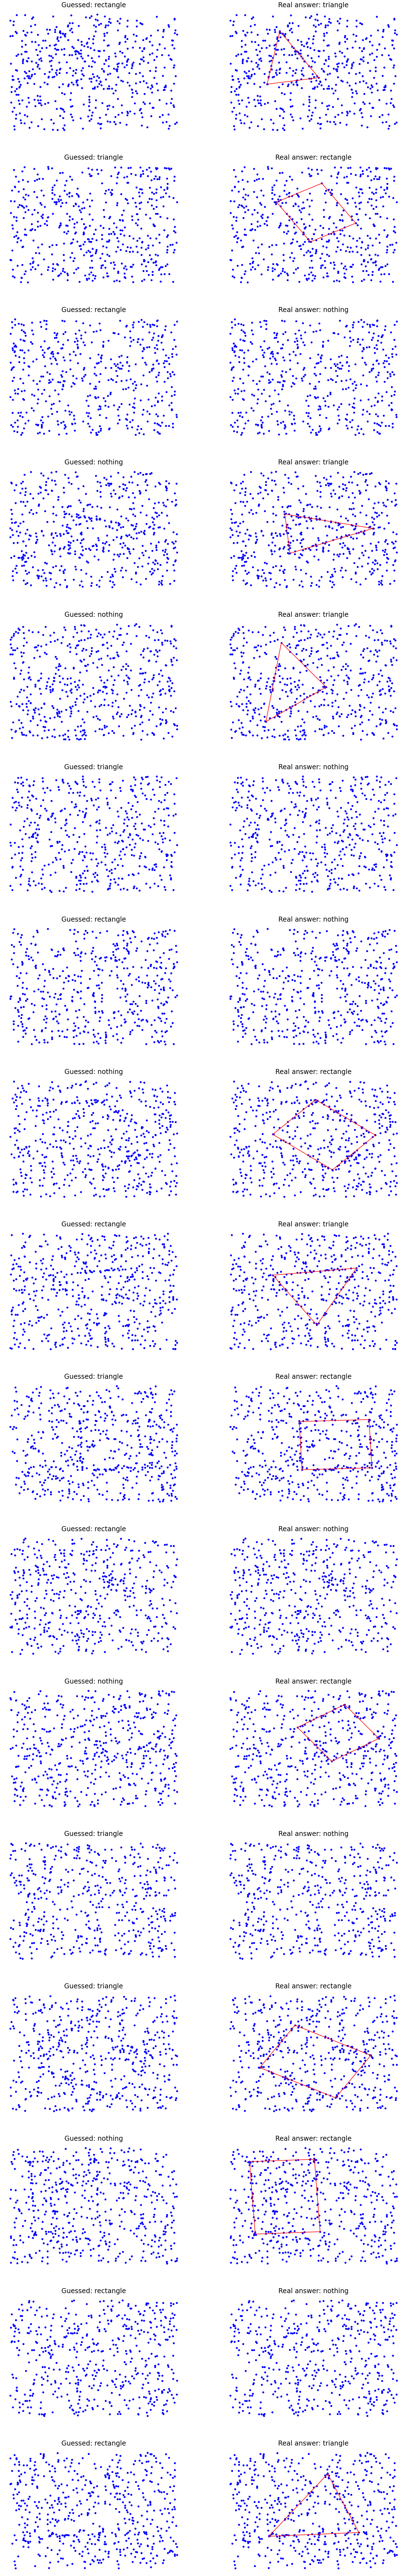

---------------SINGLE POINT TESTS---------------
Taken by: Martynas
With 0 dose

Accuracy: 0.448
Mean response time: 0.425
Response time standard deviation: 0.433


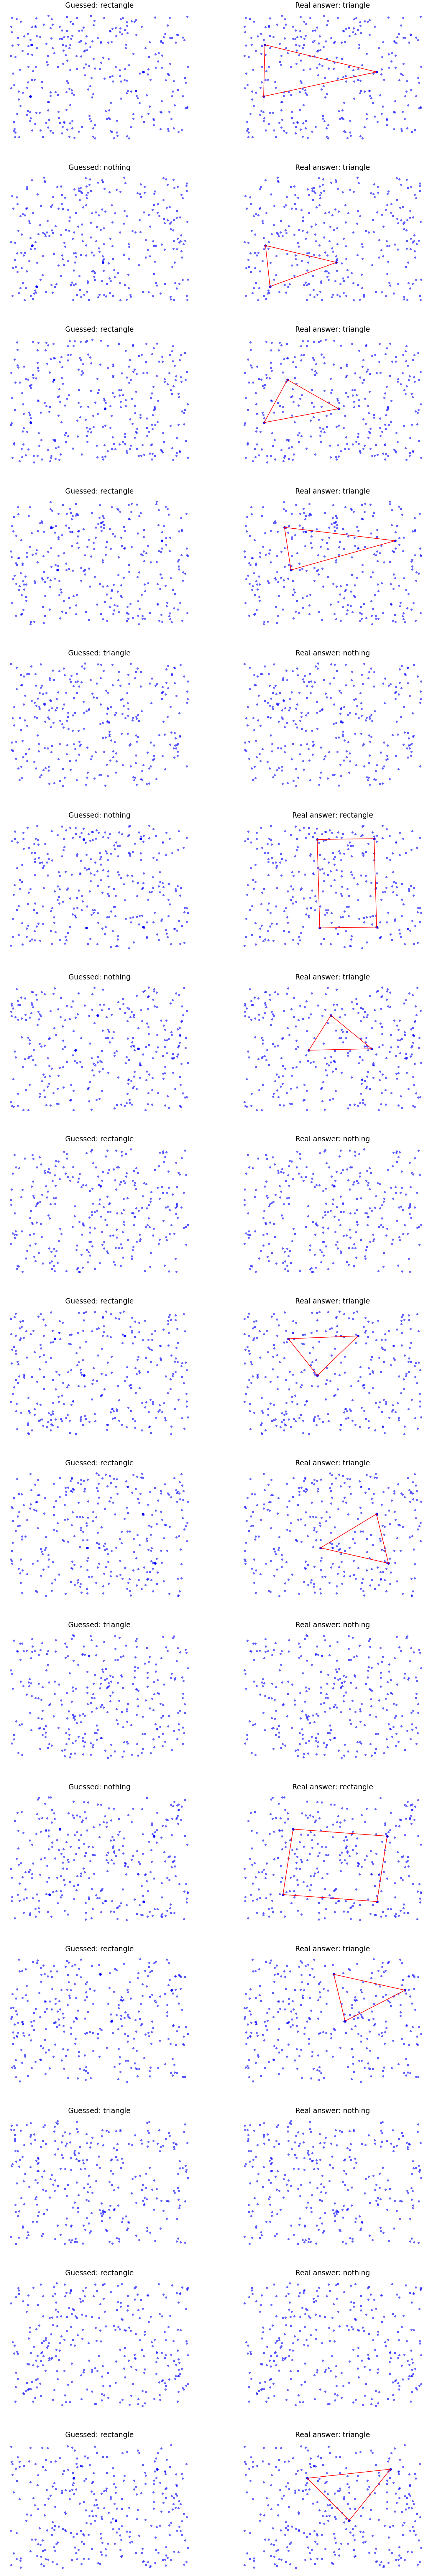

In [2]:
def print_results(path, name, dose):
    for result in os.listdir(os.path.join(path, name, dose)):
        if not name.startswith('.'):
            print(f"---------------{result[:-4]} point tests---------------".upper())
            print(f"Taken by: {name}")
            print(f"With {dose}")
            print()
            result = os.path.join(path, name, dose, result)
            Experiment.from_pickle(result).results()

def find_doses(path, name):
    for dose in os.listdir(os.path.join(path, name)):
        if not name.startswith('.'):
            print_results(path, name, dose)

path = 'results'
for name in os.listdir(path):
    if not name.startswith('.'):
        find_doses(path, name)